<a href="https://colab.research.google.com/github/Cainuriel/Machine-Learning/blob/master/Tic_Tac_Toe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required moduless
import numpy as np 
import pandas as pd 
import pprint,random

from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD

class tic_tac_toe_game(object):

    def __init__(self):
        self.board=np.full((3,3),2) # Matrix 3 x 3  empty places: symbol: 2

    def toss(self):
        """Function to simulate a toss and decide which player goes first

        Args:

        Returns:
        Returns 1 if player assigned mark 1 has won, or 0 if his opponent won

        """
        turn=np.random.randint(0,2,size=1)
        if turn.mean()==0:
            self.turn_monitor=0
        elif turn.mean()==1:
            self.turn_monitor=1
        return self.turn_monitor

    def move(self,player,coord):
        """Function to perform the action of placing a mark on the tic tac toe board
        After performing the action, this function flips the value of the turn_monitor to 
        the next player

        Args:
        player: 1 if player who is assigned the mark 1 is performing the action, 
        0 if his opponent is performing the action
        coord: The coordinate where the 1 or 0 is to be placed on the 
        tic-tac-toe board (numpy array)

        Returns:
        game_status(): Calls the game status function and returns its value
        board: Returns the new board state after making the move

        """
        if self.board[coord]!=2 or self.game_status()!="In Progress" or self.turn_monitor!=player:
            raise ValueError("Invalid move")
        self.board[coord]=player
        self.turn_monitor=1-player
        return self.game_status(),self.board


    def game_status(self):
        """Function to check the current status of the game, 
        whether the game has been won, drawn or is in progress

        Args:

        Returns:
        "Won" if the game has been won, "Drawn" if the 
        game has been drawn, or "In Progress", if the game is still in progress

        """
        #check for a win along rows
        for i in range(self.board.shape[0]):
            if 2 not in self.board[i,:] and len(set(self.board[i,:]))==1:
                return "Won"
        #check for a win along columns
        for j in range(self.board.shape[1]):
            if 2 not in self.board[:,j] and len(set(self.board[:,j]))==1:
                return "Won"
        # check for a win along diagonals
        if 2 not in np.diag(self.board) and len(set(np.diag(self.board)))==1:
            return "Won"
        if 2 not in np.diag(np.fliplr(self.board)) and len(set(np.diag(np.fliplr(self.board))))==1:
            return "Won"
        # check for a Draw
        if not 2 in self.board:
            return "Drawn"
        else:
            return "In Progress"
       


Using TensorFlow backend.


        Testing the Tic Tac Toe game
To simply test the tic-tac-toe game created above, let us play a dummy game. We make the moves for both the players.

In [4]:
# create an object of the class tick_tac_toe_game 
game=tic_tac_toe_game()
# toss to decide which player goes first
game.toss()
print("Player ",game.turn_monitor," has won the toss")
# make the first move
print("Initial board state \n",game.board)
print("Let first player place their mark on 0,0")
game_status,board=game.move(game.turn_monitor,(0,0))
print("New Board State: \n",board)
print("Let second player place their mark on 0,1")
game_status,board=game.move(game.turn_monitor,(0,1))
print("New Board State: \n",board)
print("Let first player place their mark on 1,1")
game_status,board=game.move(game.turn_monitor,(1,1))
print("New Board State: \n",board)
print("Let second player place their mark on 0,2")
game_status,board=game.move(game.turn_monitor,(0,2))
print("New Board State: \n",board)
print("Let first player place their mark on 2,2")
game_status,board=game.move(game.turn_monitor,(2,2))
print("New Board State: \n",board)
print("Player ",1-game.turn_monitor," Has ",game_status)




Player  0  has won the toss
Initial board state 
 [[2 2 2]
 [2 2 2]
 [2 2 2]]
Let first player place their mark on 0,0
New Board State: 
 [[0 2 2]
 [2 2 2]
 [2 2 2]]
Let second player place their mark on 0,1
New Board State: 
 [[0 1 2]
 [2 2 2]
 [2 2 2]]
Let first player place their mark on 1,1
New Board State: 
 [[0 1 2]
 [2 0 2]
 [2 2 2]]
Let second player place their mark on 0,2
New Board State: 
 [[0 1 1]
 [2 0 2]
 [2 2 2]]
Let first player place their mark on 2,2
New Board State: 
 [[0 1 1]
 [2 0 2]
 [2 2 0]]
Player  0  Has  Won


The legal moves generator accepts the board state and player as input, and provides the set of all possible legal moves as output.

Basically, for a given board state and player, it tells us where all the player can place his mark legally (the player can only place the mark where there is no opponent's mark)

In [0]:
def legal_moves_generator(current_board_state,turn_monitor):
    """Function that returns the set of all possible legal moves and resulting board states, 
    for a given input board state and player

    Args:
    current_board_state: The current board state
    turn_monitor: 1 if it's the player who places the mark 1's turn to play, 0 if its his opponent's turn

    Returns:
    legal_moves_dict: A dictionary of a list of possible next coordinate-resulting board state pairs
    The resulting board state is flattened to 1 d array

    """
    legal_moves_dict={}
    for i in range(current_board_state.shape[0]):
        for j in range(current_board_state.shape[1]):
            if current_board_state[i,j]==2:
                board_state_copy=current_board_state.copy()
                board_state_copy[i,j]=turn_monitor
                legal_moves_dict[(i,j)]=board_state_copy.flatten()
    return legal_moves_dict

Testing the Legal Moves Generator
Let us test the above created Legal Moves Generator.

We start a dummy game, and do the toss. We then pass the current board state and toss winner to the Legal Moves Generator,

It returns the dictionary of legal moves that it returns

The dictionary is of the form "possible next legal move coordinate":"flattened resulting board state"

In [6]:
game=tic_tac_toe_game()
game.toss()
print("Player ",game.turn_monitor," has won the toss")
print("Current board state \n",game.board)
legal_moves_dict=legal_moves_generator(game.board,game.turn_monitor)
print("Dictionary of Possible Next Legal Moves:")
pprint.pprint(legal_moves_dict)

Player  0  has won the toss
Current board state 
 [[2 2 2]
 [2 2 2]
 [2 2 2]]
Dictionary of Possible Next Legal Moves:
{(0, 0): array([0, 2, 2, 2, 2, 2, 2, 2, 2]),
 (0, 1): array([2, 0, 2, 2, 2, 2, 2, 2, 2]),
 (0, 2): array([2, 2, 0, 2, 2, 2, 2, 2, 2]),
 (1, 0): array([2, 2, 2, 0, 2, 2, 2, 2, 2]),
 (1, 1): array([2, 2, 2, 2, 0, 2, 2, 2, 2]),
 (1, 2): array([2, 2, 2, 2, 2, 0, 2, 2, 2]),
 (2, 0): array([2, 2, 2, 2, 2, 2, 0, 2, 2]),
 (2, 1): array([2, 2, 2, 2, 2, 2, 2, 0, 2]),
 (2, 2): array([2, 2, 2, 2, 2, 2, 2, 2, 0])}


Below, we create the neural network. The weights of the neural network are intialized randomly.

The architecture/hyperparameters of the neural network were picked through trial and error, and can be optimized further.

The neural network takes the flattened tic-tac-toe board numpy array as input and outputs a score.

In [7]:
model = Sequential()
model.add(Dense(18, input_dim=9,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(9, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(5, kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))

learning_rate = 0.001
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum,nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                180       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


The Program Move Selector selects the next move for a player given the current board state using the following approach:



1.  Use the **Legal Moves Generator** to get all the possible next legal board states

2. Use the **Evaluator (model)** to score each possible next board state

3. The next board state that is assigned **the highest score is selected as the next board state**


In [0]:
def move_selector(model,current_board_state,turn_monitor):
    """Function that selects the next move to make from a set of possible legal moves

    Args:
    model: The Evaluator function to use to evaluate each possible next board state
    turn_monitor: 1 if it's the player who places the mark 1's turn to play, 0 if its his opponent's turn

    Returns:
    selected_move: The numpy array coordinates where the player should place thier mark
    new_board_state: The flattened new board state resulting from performing above selected move
    score: The score that was assigned to the above selected_move by the Evaluator (model)

    """
    tracker={}
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    for legal_move_coord in legal_moves_dict:
        score=model.predict(legal_moves_dict[legal_move_coord].reshape(1,9))
        tracker[legal_move_coord]=score
    selected_move=max(tracker, key=tracker.get)
    new_board_state=legal_moves_dict[selected_move]
    score=tracker[selected_move]
    return selected_move,new_board_state,score

**Testing the Program Move Selector**
Let us play a dummy game and use the above created **Program Move Selector function** to select the next move

In [9]:
# new game
game=tic_tac_toe_game()
# toss
game.toss()
# choose the first move
print("Player assigned mark 1",game.turn_monitor," won the toss")
print("Initial board state:")
print(game.board)
selected_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
print("Selected move: ",selected_move)
print("Resulting new board state: ",new_board_state)
print("Score assigned to above board state by Evaluator(model): ", score)

Player assigned mark 1 1  won the toss
Initial board state:
[[2 2 2]
 [2 2 2]
 [2 2 2]]
Selected move:  (2, 1)
Resulting new board state:  [2 2 2 2 2 2 2 1 2]
Score assigned to above board state by Evaluator(model):  [[-0.00104159]]


Please note that since the Evaluator (model) has not yet been trained and has been assigned random weights, hence the score above is a random number

In [0]:
def row_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent
    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        #check for a win along rows
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and len(set(current_board_state_copy[i,:]))==1:
                selected_move=legal_move_coord
                return selected_move
            
def column_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent
    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and len(set(current_board_state_copy[:,j]))==1:
                        selected_move=legal_move_coord
                        return selected_move

def diag1_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(current_board_state_copy) and len(set(np.diag(current_board_state_copy)))==1:
            selected_move=legal_move_coord
            return selected_move
            
def diag2_winning_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal and identify coordinate amongst the legal coordinates that will
    result in a winning board state

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to win for the opponent

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and len(set(np.diag(np.fliplr(current_board_state_copy))))==1:
            selected_move=legal_move_coord
            return selected_move
            
#------------#

def row_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates 
    that will prevent the program 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        for i in range(current_board_state_copy.shape[0]):
            if 2 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==1).sum()==2:
                if not (2 not in current_board_state[i,:] and (current_board_state[i,:]==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def column_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will prevent 1 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 2 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==1).sum()==2:
                        if not (2 not in current_board_state[:,j] and (current_board_state[:,j]==1).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

def diag1_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal 1 and identify coordinate amongst the legal coordinates that will prevent 1 
    from winning

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will block 1 from winning

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor    
        if 2 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==1).sum()==2:
                if not (2 not in np.diag(current_board_state) and (np.diag(current_board_state)==1).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def diag2_block_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal wise and identify coordinate amongst the legal coordinates that will
    result in a column having only 0s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 2 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==1).sum()==2:
            if not (2 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==1).sum()==2):
                selected_move=legal_move_coord
                return selected_move

#---------------#
def row_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan rowwise and identify coordinate amongst the legal coordinates that will
    result in a row having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for i in range(current_board_state_copy.shape[0]):
            if 1 not in current_board_state_copy[i,:] and (current_board_state_copy[i,:]==0).sum()==2:
                if not (1 not in current_board_state[i,:] and (current_board_state[i,:]==0).sum()==2):
                    selected_move=legal_move_coord
                    return selected_move
            
def column_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan column wise and identify coordinate amongst the legal coordinates that will
    result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        
        for j in range(current_board_state_copy.shape[1]):
                    if 1 not in current_board_state_copy[:,j] and (current_board_state_copy[:,j]==0).sum()==2:
                        if not (1 not in current_board_state[:,j] and (current_board_state[:,j]==0).sum()==2):
                            selected_move=legal_move_coord
                            return selected_move

def diag1_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan diagonal wise and identify coordinate amongst the legal coordinates that will
    result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(current_board_state_copy) and (np.diag(current_board_state_copy)==0).sum()==2:
            if not (1 not in np.diag(current_board_state) and (np.diag(current_board_state)==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move
            
def diag2_second_move_check(current_board_state,legal_moves_dict,turn_monitor):
    """Function to scan second diagonal wise and identify coordinate amongst 
    the legal coordinates that will result in a column having two 0s and no 1s

    Args:
    legal_moves_dict: Dictionary of legal next moves
    turn_monitor: whose turn it is to move
    
    Returns:
    selected_move: The coordinates of numpy array where opponent places their mark

    """ 
    legal_move_coords =  list(legal_moves_dict.keys())
    random.shuffle(legal_move_coords)
    for legal_move_coord in legal_move_coords:
        current_board_state_copy=current_board_state.copy()
        current_board_state_copy[legal_move_coord]=turn_monitor
        if 1 not in np.diag(np.fliplr(current_board_state_copy)) and (np.diag(np.fliplr(current_board_state_copy))==0).sum()==2:
            if not (1 not in np.diag(np.fliplr(current_board_state)) and (np.diag(np.fliplr(current_board_state))==0).sum()==2):
                selected_move=legal_move_coord
                return selected_move
    
def opponent_move_selector(current_board_state,turn_monitor,mode):
    """Function that picks a legal move for the opponent

    Args:
    current_board_state: Current board state
    turn_monitor: whose turn it is to move
    mode: whether hard or easy mode

    Returns:
    selected_move: The coordinates of numpy array where placing the 0 will lead to two 0s being there (and no 1s)

    """ 
    legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
    
    winning_move_checks=[row_winning_move_check,column_winning_move_check,diag1_winning_move_check,diag2_winning_move_check]
    block_move_checks=[row_block_move_check,column_block_move_check,diag1_block_move_check,diag2_block_move_check]
    second_move_checks=[row_second_move_check,column_second_move_check,diag1_second_move_check,diag2_second_move_check]

    if mode=="Hard":
        random.shuffle(winning_move_checks)
        random.shuffle(block_move_checks)
        random.shuffle(second_move_checks)        
        
        for fn in winning_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in block_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        for fn in second_move_checks:
            if fn(current_board_state,legal_moves_dict,turn_monitor):
                return fn(current_board_state,legal_moves_dict,turn_monitor)
            
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move
    
    elif mode=="Easy":
        legal_moves_dict=legal_moves_generator(current_board_state,turn_monitor)
        selected_move=random.choice(list(legal_moves_dict.keys()))
        return selected_move

In [0]:
def train(model,mode,print_progress=False):
    """Function trains the Evaluator (model) by playing a game against an opponent 
    playing random moves, and updates the weights of the model after the game
    
    Note that the model weights are updated using SGD with a batch size of 1

    Args:
    model: The Evaluator function being trained

    Returns:
    model: The model updated using SGD
    y: The corrected scores

    """ 
    # start the game
    if print_progress==True:
        print("___________________________________________________________________")
        print("Starting a new game")
    game=tic_tac_toe_game()
    game.toss()
    scores_list=[]
    corrected_scores_list=[]
    new_board_states_list=[]
    
    while(1):
        if game.game_status()=="In Progress" and game.turn_monitor==1:
            # If its the program's turn, use the Move Selector function to select the next move
            selected_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
            scores_list.append(score[0][0])
            new_board_states_list.append(new_board_state)
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Program's Move")
                print(board)
                print("\n")
        elif game.game_status()=="In Progress" and game.turn_monitor==0:
            selected_move=opponent_move_selector(game.board,game.turn_monitor,mode=mode)
        
            # Make the next move
            game_status,board=game.move(game.turn_monitor,selected_move)
            if print_progress==True:
                print("Opponent's Move")
                print(board)
                print("\n")
        else:
            break

    
    # Correct the scores, assigning 1/0/-1 to the winning/drawn/losing final board state, 
    # and assigning the other previous board states the score of their next board state
    new_board_states_list=tuple(new_board_states_list)
    new_board_states_list=np.vstack(new_board_states_list)
    if game_status=="Won" and (1-game.turn_monitor)==1: 
        corrected_scores_list=shift(scores_list,-1,cval=1.0)
        result="Won"
    if game_status=="Won" and (1-game.turn_monitor)!=1:
        corrected_scores_list=shift(scores_list,-1,cval=-1.0)
        result="Lost"
    if game_status=="Drawn":
        corrected_scores_list=shift(scores_list,-1,cval=0.0)
        result="Drawn"
    if print_progress==True:
        print("Program has ",result)
        print("\n Correcting the Scores and Updating the model weights:")
        print("___________________________________________________________________\n")
        
    x=new_board_states_list
    y=corrected_scores_list
    
    def unison_shuffled_copies(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    
    # shuffle x and y in unison
    x,y=unison_shuffled_copies(x,y)
    x=x.reshape(-1,9) 
    
    # update the weights of the model, one record at a time
    model.fit(x,y,epochs=1,batch_size=1,verbose=0)
    return model,y,result

A sample single training game
Note that the program will always play the mark '1' and the opponent will always play mark '0'.

below, we run a single iteration of training, or in other words, a single game of tic-tac-toe between the program and opponent.

In [12]:
updated_model,y,result=train(model,mode="Hard",print_progress=True)

___________________________________________________________________
Starting a new game
Program's Move
[[2 2 2]
 [2 2 2]
 [2 1 2]]


Opponent's Move
[[2 2 0]
 [2 2 2]
 [2 1 2]]


Program's Move
[[2 2 0]
 [2 2 2]
 [2 1 1]]


Opponent's Move
[[2 2 0]
 [2 2 2]
 [0 1 1]]


Program's Move
[[1 2 0]
 [2 2 2]
 [0 1 1]]


Opponent's Move
[[1 2 0]
 [2 0 2]
 [0 1 1]]


Program has  Lost

 Correcting the Scores and Updating the model weights:
___________________________________________________________________



**Training by playing a large number of games**
We play 200,000 games of tic-tac-toe between the program and the opponent. We record the result of each game and plot the distribution of wins/losses/draws by the program over fixed intervals of games

In [13]:
game_counter=1
data_for_graph=pd.DataFrame()

mode_list=["Easy","Hard"]

while(game_counter<=200000):
    mode_selected=np.random.choice(mode_list, 1, p=[0.5,0.5])
    model,y,result=train(model,mode=mode_selected[0],print_progress=False)
    data_for_graph=data_for_graph.append({"game_counter":game_counter,"result":result},ignore_index=True)
    if game_counter % 10000 == 0:
        print("Game#: ",game_counter)
        print("Mode: ",mode_selected[0])
    game_counter+=1

Game#:  10000
Mode:  Hard
Game#:  20000
Mode:  Easy
Game#:  30000
Mode:  Hard
Game#:  40000
Mode:  Hard
Game#:  50000
Mode:  Hard
Game#:  60000
Mode:  Easy
Game#:  70000
Mode:  Hard
Game#:  80000
Mode:  Hard
Game#:  90000
Mode:  Easy
Game#:  100000
Mode:  Easy
Game#:  110000
Mode:  Hard


KeyboardInterrupt: ignored

Text(0.5,1,'Distribution of Results Vs Count of Games Played')

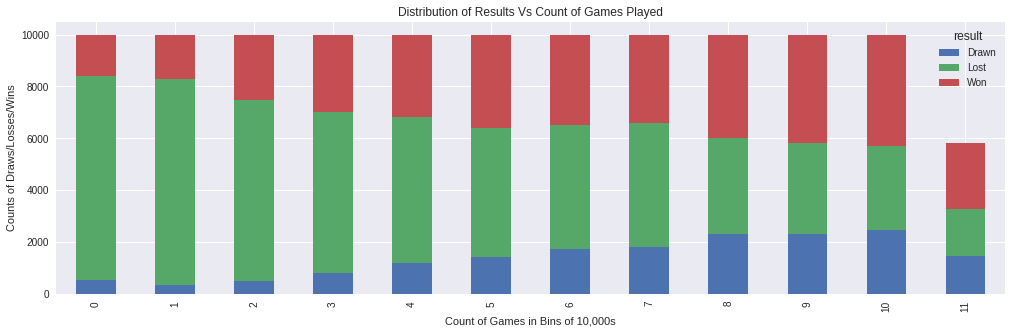

In [14]:
bins = np.arange(1, game_counter/10000) * 10000
data_for_graph['game_counter_bins'] = np.digitize(data_for_graph["game_counter"], bins, right=True)
counts = data_for_graph.groupby(['game_counter_bins', 'result']).game_counter.count().unstack()
ax=counts.plot(kind='bar', stacked=True,figsize=(17,5))
ax.set_xlabel("Count of Games in Bins of 10,000s")
ax.set_ylabel("Counts of Draws/Losses/Wins")
ax.set_title('Distribution of Results Vs Count of Games Played')

Observations:
It can be observed in the above graph, that as the Program played more and more games against the opponent, its win rate increased and its loss rate reduced
Due to the noisy nature of the training, I would not be able to provide more specific observations, since the above graph is going to look different each time this kernel is run

In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
# from keras.models import load_model
# model = load_model('my_model.h5')

# PLAYING AGAINST PROGRAM

In [16]:
print("___________________________________________________________________")
print("Welcome to the Tic Tac Toe Game")
print("You will be playing against the self learned Program")
print("When it is your move, enter the coordinates in the form rownumber,columnnumber")
print(" For example, to place 0 at the top right corner, enter 0,2")
print("___________________________________________________________________")

play_again="Y"
while(play_again=="Y"):
    print("___________________________________________________________________")
    print("Starting a new Game")
    game=tic_tac_toe_game()
    game.toss()
    print(game.board)
    print(game.turn_monitor," has won the toss")

    while(1):
        if game.game_status()=="In Progress" and game.turn_monitor==0:
            print("Your Turn")
            while(1):
                try:
                    print('Enter where you would like to place a 0 in the form rownumber,columnnumber: ')
                    instr = input()
                    inList = [int(n) for n in instr.split(',')] 
                    coord = tuple(inList)
                    print(coord)
                    game_status,board=game.move(0,coord)
                    print(board)
                    break
                except:
                    print("Invalid Move")
        elif game.game_status()=="In Progress" and game.turn_monitor==1:
            print("Program's turn")
            chosen_move,new_board_state,score=move_selector(model,game.board,game.turn_monitor)
            game_status,board=game.move(game.turn_monitor,chosen_move)
            print(board)
        else:
            break

    if game_status=="Won" and (1-game.turn_monitor)==1: 
        print("Program has won")
    if game_status=="Won" and (1-game.turn_monitor)==0:
        print("You has won")
    if game_status=="Drawn":
        print("Game Drawn")
    print("Would you like to play again?Y/N")
    play_again=input()

___________________________________________________________________
Welcome to the Tic Tac Toe Game
You will be playing against the self learned Program
When it is your move, enter the coordinates in the form rownumber,columnnumber
 For example, to place 0 at the top right corner, enter 0,2
___________________________________________________________________
___________________________________________________________________
Starting a new Game
[[2 2 2]
 [2 2 2]
 [2 2 2]]
1  has won the toss
Program's turn
[[2 2 1]
 [2 2 2]
 [2 2 2]]
Your Turn
Enter where you would like to place a 0 in the form rownumber,columnnumber: 
1,1
(1, 1)
[[2 2 1]
 [2 0 2]
 [2 2 2]]
Program's turn
[[2 2 1]
 [2 0 2]
 [2 2 1]]
Your Turn
Enter where you would like to place a 0 in the form rownumber,columnnumber: 
1,2
(1, 2)
[[2 2 1]
 [2 0 0]
 [2 2 1]]
Program's turn
[[2 2 1]
 [1 0 0]
 [2 2 1]]
Your Turn
Enter where you would like to place a 0 in the form rownumber,columnnumber: 
0,1
(0, 1)
[[2 0 1]
 [1 0 0]
 [2 2 1